**Tarea correspondiente a la clase 01-04-2022**

Estado transitorio y estado estable

Convertimos el código para estimar el tiempo de respuesta del sistema o retraso promedio en una función mm1_W de tres parámetros, que nos devuelve el retraso promedio W. Observar que la salida es un número: el promedio de los datos guardados en r_Data.


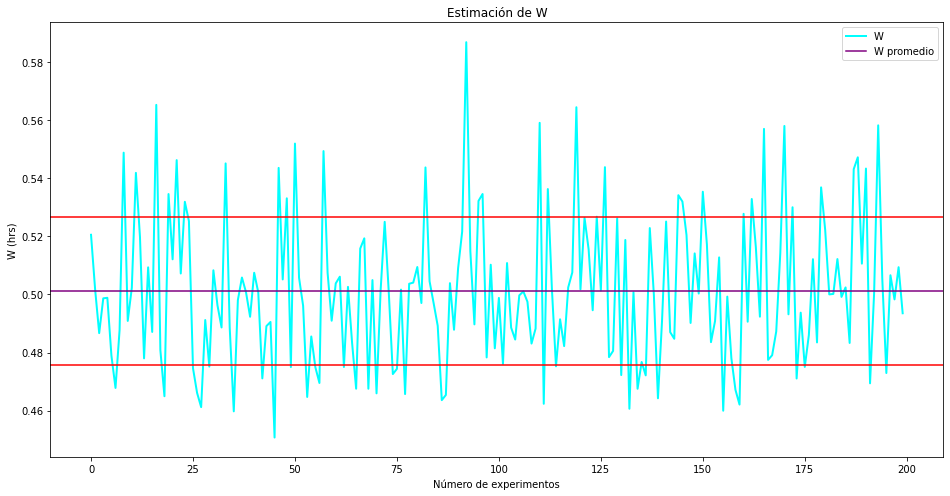

Retraso promedio W =  0.5011
Con un error de = 0.0254
W está entre: 0.4757 y 0.5266


In [30]:
from random import expovariate
from statistics import mean, pstdev
from math import inf as Infinity
from random import seed
from matplotlib.pyplot import *
from time import time

def mm1_W(lamda, mu, Num_Pkts):
    #Num_Pkts = 100000                   # Numero de paquetes a simular
    #T = 100000
    count = 0                           # Contador de paquetes simulados
    t = 0
    N = 0                               # Variable de estado: numero de paquetes en el sistema

    tll = expovariate(lamda)            # Tiempo de llegada
    ts = Infinity                       # Tiempo de salida

    # Variables de salida
    tll_Data = []                       # Lista de tiempos de llegada
    ts_Data = []                        # Lista de tiempos de salida
    r_Data = []                         # Lista de retrasos individuales

    while count < Num_Pkts:
    #while t < T:
        if tll < ts:                           # Evento de llegada
            t = tll
            tll_Data.append(t)
            N = N + 1.0
            tll = t + expovariate(lamda) 
            if N == 1:
                ts = t + expovariate(mu)
        else:                                         # Evento de salida
            t = ts 
            ts_Data.append(t)
            N = N - 1.0
            count = count + 1                         # Paquetes simulados
            if N > 0:
                ts = t + expovariate(mu)
            else:
                ts = Infinity

    # Estimación del retraso promedio:

    for i in range(Num_Pkts):
    #for i in range(T):
        d = ts_Data[i] - tll_Data[i]
        r_Data.append(d)

    return mean(r_Data)

#mm1_W(4.0,6.0,100)

lamda = 4.0
mu = 6.0


Num_Rep = 200                       # Numero de repeticiones
Delay = []                          # Lista de resultados para el retraso promedio W 

for i in range(Num_Rep):
    seed() 
    d = mm1_W(lamda, mu,10000)
    Delay.append(d)

# Estimación del promedio de las repeticiones

fig = figure(1, figsize=(16,8))
plot(Delay, linewidth=2, label='W',color='aqua')
axhline(y=mean(Delay), color='purple',label='W promedio')
axhline(y=mean(Delay) + pstdev(Delay), color='red')
axhline(y=mean(Delay) - pstdev(Delay), color='red')
title("Estimación de W")
xlabel('Número de experimentos')
ylabel('W (hrs)')
legend()
show()


print("Retraso promedio W = " , round( mean(Delay), 4) )
print("Con un error de =", round(pstdev(Delay), 4))
print("W está entre:" , round(mean(Delay) - pstdev(Delay), 4), "y", round(mean(Delay) + pstdev(Delay), 4) )

Usaremos la misma función mm1_W pero ahora pediremos que devuelva la lista de datos completos, no solamente la media.

In [34]:
def mm1_W(lamda, mu, Num_Pkts):
    #Num_Pkts = 100000                   # Numero de paquetes a simular
    #T = 100000
    count = 0                           # Contador de paquetes simulados
    t = 0
    N = 0                               # Variable de estado: numero de paquetes en el sistema

    tll = expovariate(lamda)            # Tiempo de llegada
    ts = Infinity                       # Tiempo de salida

    # Variables de salida
    tll_Data = []                       # Lista de tiempos de llegada
    ts_Data = []                        # Lista de tiempos de salida
    r_Data = []                         # Lista de retrasos individuales

    while count < Num_Pkts:
    #while t < T:
        if tll < ts:                           # Evento de llegada
            t = tll
            tll_Data.append(t)
            N = N + 1.0
            tll = t + expovariate(lamda) 
            if N == 1:
                ts = t + expovariate(mu)
        else:                                         # Evento de salida
            t = ts 
            ts_Data.append(t)
            N = N - 1.0
            count = count + 1                         # Paquetes simulados
            if N > 0:
                ts = t + expovariate(mu)
            else:
                ts = Infinity

    # Estimación del retraso promedio:

    for i in range(Num_Pkts):
    #for i in range(T):
        d = ts_Data[i] - tll_Data[i]
        r_Data.append(d)

    return r_Data


def mm1_W_cum(lamda, mu, Num_Pkts):
    Delay = mm1_W(lamda, mu, Num_Pkts)
    Delay_Cum = []
    for i in range(Num_Pkts):
        Delay_Cum.append( sum(Delay[0:i+1])/(i+1) )

    return Delay_Cum

Esto nos permitirá implementar un método sencillo para determinar visulmente un punto de división entre los estados transitorio y estable.

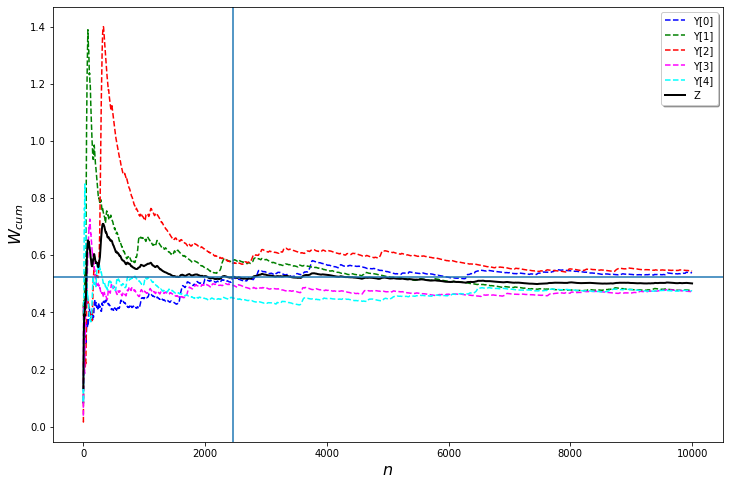

In [35]:
lamda = 4.0
mu = 6.0

n = 10000                         # Número de clientes/paquetes simulados
R = 5                             # Número de repeticiones

Y =  np.zeros( shape = (R, n) )   # Variable de salida W

# Generamos las muestras/repeticiones
for i in range(R):
    seed()
    Y[i] = mm1_W_cum(lamda, mu, n)

# Calculamos la media
Z = []
for i in range(n):
    Z.append( sum(Y[:,i]) / R )

ListaF = [round(i,5) for i in Z]

y=round(mean(Z),5)


# Graficamos Y y Z
fig = figure(1, figsize=(12, 8))
plot(Y[0], "k--", label="Y[0]", color='blue')
plot(Y[1], "k--", label="Y[1]", color='green')
plot(Y[2], "k--", label="Y[2]", color='red')
plot(Y[3], "k--", label="Y[3]", color='magenta')
plot(Y[4], "k--", label="Y[4]", color='cyan')
plot(Z, "k", linewidth=2, label="Z")

axhline(y)
k=ListaF.index(y)
axvline(k)

xlabel("$n$", size=16)
ylabel("$W_{cum}$", size=16)
legend(loc='upper right', shadow=True)
show()